<a href="https://colab.research.google.com/github/brhie/Netflix-Data-Analysis/blob/main/Netflix_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Netflix Data Analysis!
- The initial data is from Kaggle!
- Practicing the basics of python data analysis


#### Prepare to use kaggle

In [ ]:
# Prepare the import data from Kaggle
! pip3 install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"brianrhie","key":"00c85733779ecc879d96e4332f77656f"}'}

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                               size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  --------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
khushikyad001/water-pollution-and-disease                   Water Pollution & Disease                         148486  2025-04-03 15:46:19.363000           1488         23  1.0              
atharvasoundankar/chocolate-sales                           Chocolate Sales Data 📊🍫                            14473  2025-03-19 03:51:40.270000          20624        340  1.0              
adilshamim8/student-depression-dataset                      Student Depression Dataset                        467020  2025-03-13 03:12:30.423000          11546        166  1.0              
khushikyad001/air-pollution-in-china-2015-2025    

In [ ]:
!kaggle datasets download shivamb/netflix-shows

Dataset URL: https://www.kaggle.com/datasets/shivamb/netflix-shows
License(s): CC0-1.0
netflix-shows.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! mkdir netflix

mkdir: cannot create directory ‘netflix’: File exists


In [ ]:
! unzip netflix-shows.zip -d netflix

Archive:  netflix-shows.zip
replace netflix/netflix_titles.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: netflix/netflix_titles.csv  


### What are the business questions we wish to answer with this project?


1.   How many new shows and movies does netflix add each year?
2.   What country produced the most content?
3.   What are the the most common genres?
4.   What's the average movie duration on Netflix?
5.   Which directors have the most shows/movies?
6.   Has content from certain countries increased or decreased over time?
7. When is the best time of the year to release contents?

### Steps to anaylising data


1.   Load data
2.   Clean data
3.   EDA/Visualization
4.   Conclusion and Extension



### Analysis

In [ ]:
# Loading the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

netflix = pd.read_csv("./netflix/netflix_titles.csv")
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
netflix.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
# Clean the data
netflix["date_added"] = pd.to_datetime(netflix["date_added"], format='mixed')
netflix["listed_in"] = netflix["listed_in"].str.split(", ")
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, TV...",In a city of coaching centers known to train I...


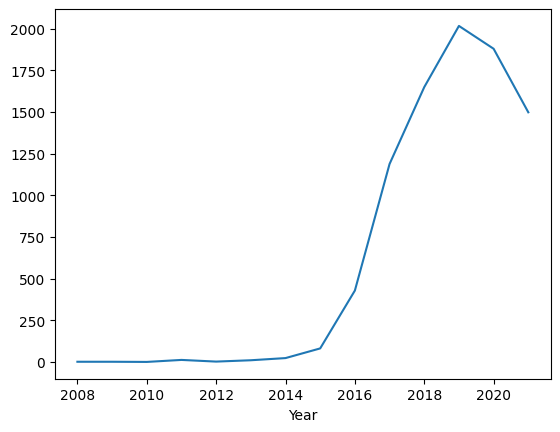

In [ ]:
# How many movies did netflix create each year?
netflix["year_added"] = netflix["date_added"].dt.year
netflix.value_counts("year_added").sort_index().plot(kind="line", xlabel="Year")
plt.show()

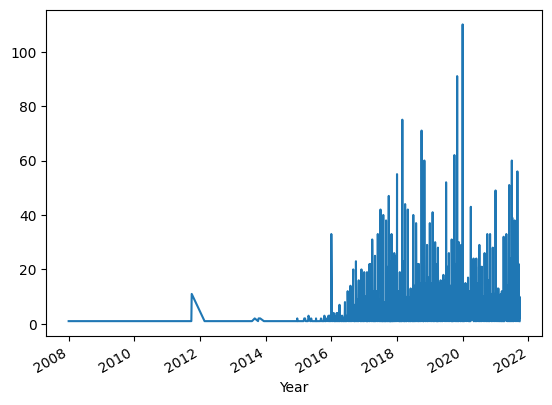

In [ ]:
# each day
netflix["date_added"].value_counts().sort_index().plot(kind="line", xlabel="Year")
plt.show()

In [ ]:
len(netflix[netflix["year_added"] == 2021])

1498

In [ ]:
# What Country Produced the most content?
netflix.explode("country").groupby("country").size().sort_values(ascending=False).head()

,0
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199


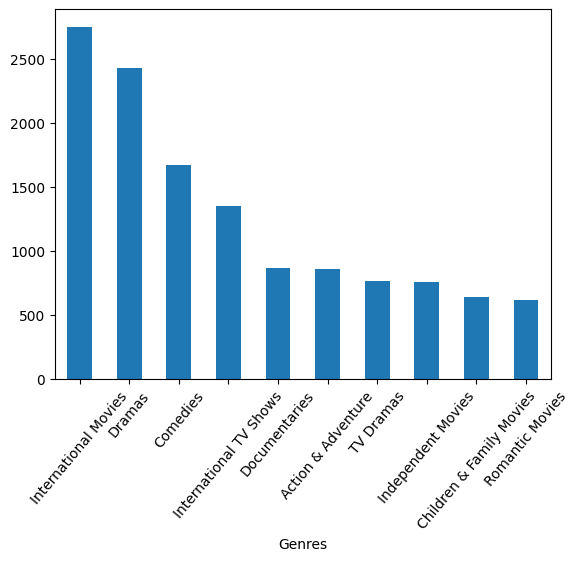

In [ ]:
# What are the the most common genres?
netflix["listed_in"].explode().value_counts().head(10).plot(kind="bar", xlabel="Genres")
plt.xticks(rotation=50)
plt.show()

<ipython-input-298-731c7e039cb6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movies["duration"] = pd.to_numeric(netflix_movies["duration"].fillna(netflix_movies["duration"].mode()[0]).str.replace(" min|in", "", regex=True), errors='coerce')


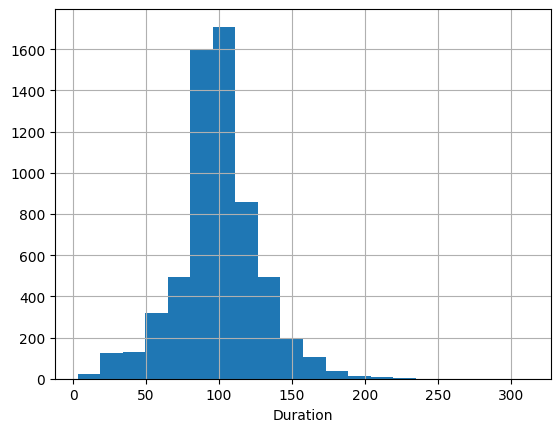

In [ ]:
# What's the average movie duration on Netflix?
netflix_movies = netflix[netflix["type"] == "Movie"]
netflix_movies["duration"] = pd.to_numeric(netflix_movies["duration"].fillna(netflix_movies["duration"].mode()[0]).str.replace(" min|in", "", regex=True), errors='coerce')
netflix_movies["duration"].hist(bins=20)
plt.xlabel("Duration")
plt.show()

In [ ]:
# Which directors have the most shows/movies?
netflix.value_counts("director")

,count
director,
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,14
...,...
Álvaro Delgado-Aparicio L.,1
Álvaro Brechner,1
Zuko Nodada,1


In [ ]:
# Has content number from certain countries increased or decreased over time?
netflix["country"] = netflix["country"].str.split(", ")
netflix_exp = netflix.explode("country").dropna(subset=["country"])

for country in netflix_exp["country"].unique():
  year_counts = netflix_exp[netflix_exp["country"] == country].value_counts("year_added")
  # Use .get() with a default value to avoid KeyError
  count2021 = year_counts.get(2021, 0)  # Default to 0 if 2021 is not found
  count2020 = year_counts.get(2020, 0)  # Default to 0 if 2020 is not found
  if count2021 == 0 and count2020 == 0:
    pass
  else:
    if count2021 > count2020:
      print(f"{country} has increased from {count2020} to {count2021}")
    elif count2021 < count2020:
      print(f"{country} has decreased from {count2020} to {count2021}")
    else:
      print(f"{country} has stayed the same from {count2020} to {count2021}")

United States has decreased from 828 to 627
South Africa has decreased from 24 to 9
India has decreased from 199 to 105
Ghana has decreased from 2 to 1
Burkina Faso has increased from 0 to 1
United Kingdom has decreased from 146 to 119
Germany has decreased from 58 to 40
Ethiopia has increased from 0 to 1
Czech Republic has decreased from 5 to 4
Mexico has decreased from 30 to 21
Turkey has decreased from 28 to 26
Australia has decreased from 27 to 24
France has decreased from 97 to 60
Finland has decreased from 3 to 2
China has decreased from 26 to 20
Canada has decreased from 110 to 59
Japan has decreased from 79 to 53
Nigeria has decreased from 42 to 28
Spain has decreased from 43 to 33
Belgium has decreased from 21 to 9
South Korea has decreased from 56 to 29
Singapore has decreased from 4 to 3
Italy has decreased from 28 to 16
Romania has stayed the same from 5 to 5
Argentina has decreased from 16 to 12
Venezuela has increased from 0 to 1
Hong Kong has stayed the same from 6 to 6


In [ ]:
increase = 0
decrease = 0
for country in netflix_exp["country"].unique():
  year_counts = netflix_exp[netflix_exp["country"] == country].value_counts("year_added")
  count2021 = year_counts.get(2021, 0)
  count2020 = year_counts.get(2020, 0)
  if count2021 > count2020:
    increase += 1
  elif count2021 < count2020:
    decrease += 1
  else:
    pass
print(f"{increase} countries increased their content")
print(f"{decrease} countries decreaded their conetent")

20 countries increased their content
67 countries decreaded their conetent


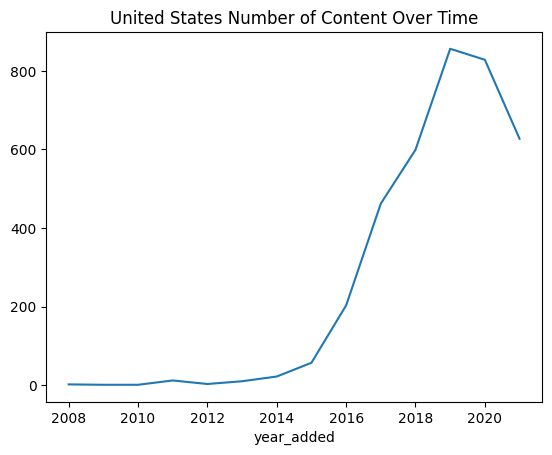

In [ ]:
netflix_exp[netflix_exp["country"] == "United States"].groupby("year_added").size().plot(kind="line")
plt.title("United States Number of Content Over Time")
plt.show()

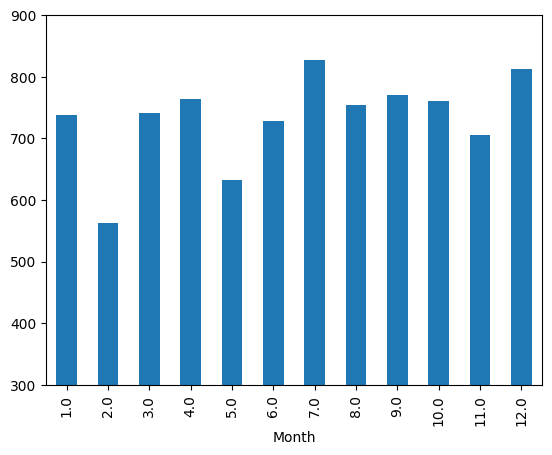

In [ ]:
# When is the best time of the year to release contents?
netflix["month_added"] = netflix["date_added"].dt.month
netflix.groupby("month_added").size().plot(kind="bar", xlabel="Month", ylim=(300, 900))
plt.xlabel()
plt.show()

### Conclusion

### Additional Missions
1. Merge with IMDB data
2. "season count" column for series
